In [1]:
#1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

# Dataset

Download dataset

In [1]:
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:00<00:00, 97.4MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00


In [4]:
import re
import string
import  nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Clean data

In [5]:
stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
  return contractions.fix(text)

#Function to clean data
def preprocessing_text(text):
  wl  = WordNetLemmatizer()

  soup = BeautifulSoup(text, 'html.parser') # Removing html tag
  text = soup.get_text()
  text = expand_contractions(text)

  emoji_clean = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\u2702-\u27B0"           # other symbols
    u"\u24C2-\U0001F251"       # enclosed characters
    "]+",
    flags=re.UNICODE
  )
  text = emoji_clean.sub(r'', text)
  text = re.sub(r'\.(?=\S)', '. ', text)
  text = re.sub(r'http\S+','',text)

  text = "".join([word.lower() for word in text if word not in string.punctuation])
  text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop])
  return text


In [7]:
df['review'] = df['review'].apply(preprocessing_text)

<ipython-input-5-98dfc9603013>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') # Removing html tag


Xóa các dữ liệu trùng lặp

In [9]:
# Hiển thị các hàng trùng lặp
duplicates = df[df.duplicated()]
print("Các hàng trùng lặp:")
print(duplicates)


Các hàng trùng lặp:
                                                  review sentiment
3537   quite producer appalling adaptation trying imp...  negative
3769   favourite police series time turn tvfilm work ...  positive
4391   beautiful film pure cassavetes style gena rowl...  positive
6352   liked grinch movie go watch near good seussian...  negative
6479   want much believe quote specifically english s...  negative
...                                                  ...       ...
49912  incredible piece drama powerful hit found film...  positive
49950  brief episode appeared one night gallery show ...  negative
49984  hello derrick cannon welcome first ever cannon...  negative
49986  movie disgrace major league franchise live min...  negative
49991  le visiteurs first movie medieval time travele...  negative

[424 rows x 2 columns]


In [10]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49576 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49576 non-null  object
 1   sentiment  49576 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [13]:
df.describe()

,review,sentiment
count,49576,49576
unique,49576,2
top,one expects star trek movie high art fan expec...,positive
freq,1,24881


## EDA

### Thống kê số lượng nhãn trong bộ dữ liệu

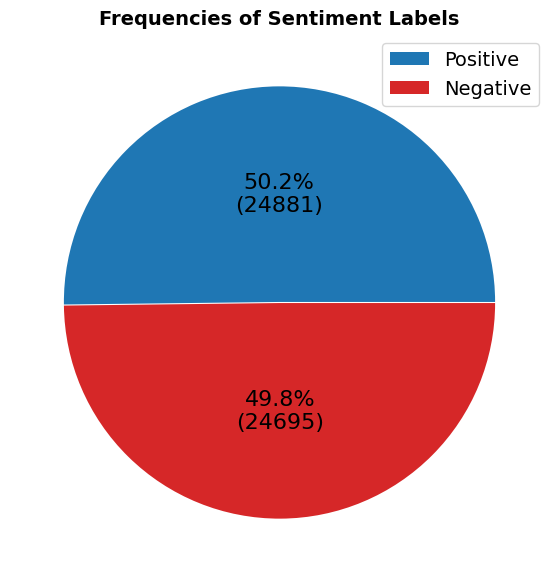

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo hàm để định dạng tỷ lệ phần trăm trong biểu đồ
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Tính số lượng nhãn cảm xúc
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

# Tạo biểu đồ hình tròn
plt.figure(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.0025] * 2,  # Tạo hiệu ứng "tách" cho mỗi phần
    pctdistance=0.5,
    colors=[sns.color_palette()[0], 'tab:red'],
    textprops={'fontsize': 16}
)

plt.title('Frequencies of Sentiment Labels', fontsize=14, fontweight='bold')
plt.legend(labels, loc="best", prop={'size': 14})
plt.savefig("PieChart.png")  # Lưu biểu đồ
plt.show()  # Hiển thị biểu đồ


### Thống kê độ dài của các mẫu cho mỗi class

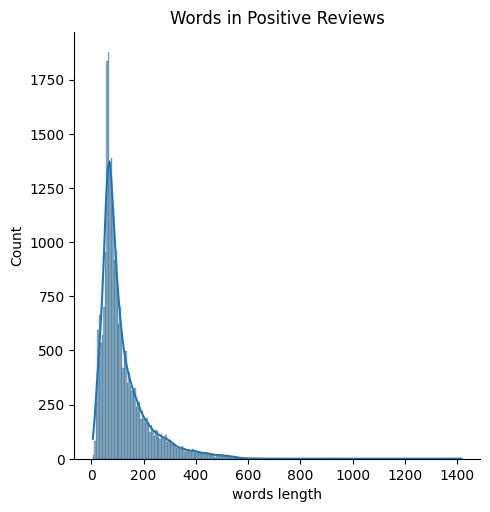

<ipython-input-24-850413f3455e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  hist_negative = sns.displot(


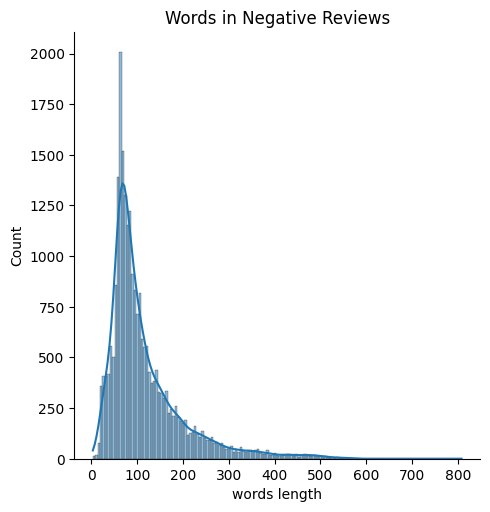

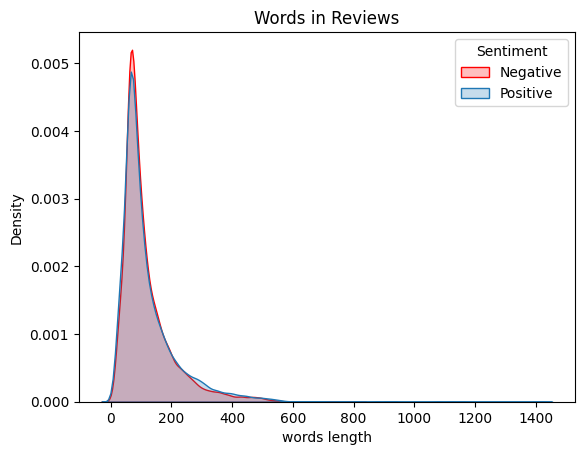

In [24]:
words_len = df['review'].str.split().map(lambda x: len(x))
#Tạo bản sao DataFrame để lưu chiều dài từ
df_temp = df.copy()
df_temp['words length'] = words_len

# Vẽ biểu đồ phân phối cho đánh giá tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x='words length', kde=True, legend=False
).set(title='Words in Positive Reviews')
plt.show()

# Vẽ biểu đồ phân phối cho đánh giá tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x='words length', kde=True, legend=False, palette=['red']
).set(title='Words in Negative Reviews')
plt.show()

# Vẽ biểu đồ phân phối kernel cho chiều dài từ
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x='words length', hue='sentiment', fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in Reviews')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

# Split data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Encoder

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.fit_transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

# Classifier

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_pred, y_test)


In [32]:
print(accuracy)

0.7145018152480839


## Random Forest

In [33]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)
y_pred_rf = rf_classifier.predict(x_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.84


# AdaBoost

In [38]:
ada_classifier = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)
ada_classifier.fit(x_train_encoded, y_train)
y_pred_ada = ada_classifier.predict(x_test_encoded)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {accuracy_ada:.2f}')

AdaBoost Accuracy: 0.83


# Gradient Boosting

In [35]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)
gb_classifier.fit(x_train_encoded, y_train)
y_pred_gb = gb_classifier.predict(x_test_encoded)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

Gradient Boosting Accuracy: 0.81


# XGBoost

In [36]:
xgb_classifier = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_classifier.fit(x_train_encoded, y_train)
y_pred_xgb = xgb_classifier.predict(x_test_encoded)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.86
